#Numpy, Matplotlib, and Pandas... Oh My!

#Matplotlib (Plotting)

In [18]:
!ls

Untitled.ipynb       data                 exercise.md          linear_algebra.ipynb pandas-extra.ipynb   pandas.ipynb


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(0,10,100)
x

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

In [15]:
plt.plot(x,2*x**3)

/Users/scott/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


#Pandas (Advanced 'Excel' of data science)

##Series


Think of a Pandas Series as a labeled one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [20]:
from numpy.random import randn
import numpy as np

In [26]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
int_series = pd.Series(range(10))
int_series.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [30]:
num_series = pd.Series(randn(10))
num_series.head()

0   -0.468079
1   -0.374178
2    0.036100
3    0.186659
4    0.363716
dtype: float64

##Indexes
Notice how each series has an index (in this case a relatively meaningless default index).
Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.
Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.
When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [31]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

California   -1.783757
Alabama       1.216885
Indiana       1.510805
Montana       0.207257
Kentucky      1.196870
dtype: float64


Washington    0.674423
Alabama      -0.351299
Montana      -0.265145
Indiana      -1.332087
New York      1.352006
dtype: float64


In [33]:
indexed_series.mean()

0.4696118748337678

In [39]:
#Pandas uses the index by default to align series for arithmetic!
result = indexed_series + alt_indexed_series
print result
print result.fillna(np.mean(result))

Alabama       0.865585
California         NaN
Indiana       0.178718
Kentucky           NaN
Montana      -0.057888
New York           NaN
Washington         NaN
dtype: float64
Alabama       0.865585
California    0.328805
Indiana       0.178718
Kentucky      0.328805
Montana      -0.057888
New York      0.328805
Washington    0.328805
dtype: float64


In [57]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='1 m')

In [58]:
dt_index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

##DataFrames
Data frames extend the concept of Series to table-like data.

In [66]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df.tail()

,a,b,c,d,e
2015-06-30,1.061968,-0.171927,-0.630774,-0.267180,0.218753
2015-07-31,1.612285,-0.692302,-0.754412,1.030789,1.010607
2015-08-31,0.168037,-0.873050,-0.634384,2.863573,-0.090921
2015-09-30,-1.407938,0.455433,1.930410,-0.840248,-0.558795
2015-10-31,1.173371,-0.264715,-1.831723,-0.021502,1.561051


In [67]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [69]:
df['a']

2015-01-31   -0.271112
2015-02-28   -0.135706
2015-03-31   -0.979261
2015-04-30   -0.138166
2015-05-31    0.375382
2015-06-30    1.061968
2015-07-31    1.612285
2015-08-31    0.168037
2015-09-30   -1.407938
2015-10-31    1.173371
Freq: M, Name: a, dtype: float64

In [70]:
#New column
df['new'] = df['a'] + df['b']
df

,a,b,c,d,e,new
2015-01-31,-0.271112,-0.148622,-0.635736,-1.700741,-0.196688,-0.419734
2015-02-28,-0.135706,-0.626662,1.495921,0.737755,-0.169425,-0.762368
2015-03-31,-0.979261,-0.225543,-1.767594,0.537571,-0.497321,-1.204804
2015-04-30,-0.138166,0.030836,0.050739,-0.603998,-1.862534,-0.107330
2015-05-31,0.375382,-1.830285,-0.012576,0.655036,0.125266,-1.454903
2015-06-30,1.061968,-0.171927,-0.630774,-0.267180,0.218753,0.890041
2015-07-31,1.612285,-0.692302,-0.754412,1.030789,1.010607,0.919983
2015-08-31,0.168037,-0.873050,-0.634384,2.863573,-0.090921,-0.705012
2015-09-30,-1.407938,0.455433,1.930410,-0.840248,-0.558795,-0.952505
2015-10-31,1.173371,-0.264715,-1.831723,-0.021502,1.561051,0.908656


In [76]:
#Delete a column
df.drop('new', axis=1)

ValueError: labels ['new'] not contained in axis

In [84]:
df[df.index == '2015-01-31']

,a,b,c,d,e
2015-01-31,-0.271112,-0.148622,-0.635736,-1.700741,-0.196688


In [88]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


In [87]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play


In [89]:
df.describe()

,Temperature,Humidity,Windy
count,14.000000,14.000000,14
mean,73.571429,80.285714,0.428571
std,6.571667,9.840486,0.513553
min,64.000000,65.000000,False
25%,69.250000,71.250000,0
50%,72.000000,80.000000,0
75%,78.750000,88.750000,1
max,85.000000,96.000000,True


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 6 columns):
Date           14 non-null object
Outlook        14 non-null object
Temperature    14 non-null int64
Humidity       14 non-null int64
Windy          14 non-null bool
Result         14 non-null object
dtypes: bool(1), int64(2), object(3)
memory usage: 686.0+ bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11307ead0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1132d3dd0>]], dtype=object)

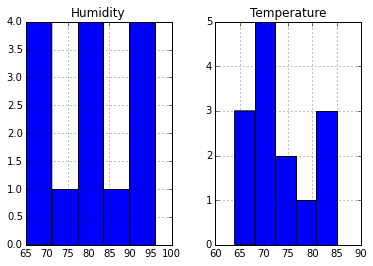

In [95]:
df.hist(['Temperature','Humidity'],bins=5)

/Users/scott/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


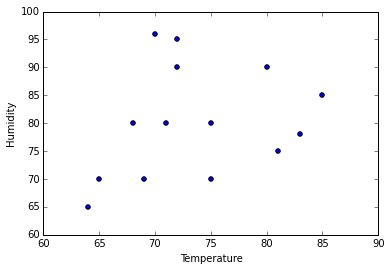

In [93]:
df.plot('Temperature', 'Humidity', kind='scatter')

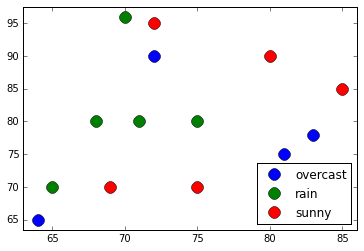

In [94]:
#for color

groups=df.groupby('Outlook')

fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()